In [31]:
import pandas as pd

# Load the dataset to inspect its structure and contents
file_path = 'Featured_dataset.csv'
data = pd.read_csv(file_path)

data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         14249 non-null  float64
 1   Latitude          14249 non-null  float64
 2   Speed             14249 non-null  float64
 3   Distance          14249 non-null  float64
 4   Time              14249 non-null  object 
 5   Acc X             14249 non-null  float64
 6   Acc Y             14249 non-null  float64
 7   Acc Z             14249 non-null  float64
 8   Heading           14249 non-null  float64
 9   gyro_x            14249 non-null  float64
 10  gyro_y            14249 non-null  float64
 11  gyro_z            14249 non-null  float64
 12  label             14249 non-null  int64  
 13  Acc_Magnitude     14249 non-null  float64
 14  Acc_Change        14249 non-null  float64
 15  Gyro_Magnitude    14249 non-null  float64
 16  Gyro_Change       14249 non-null  float6

In [35]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import KFold
import numpy as np

# Assuming 'data' is your dataset DataFrame
# Replace 'feature_columns' with your actual feature columns
feature_columns = ['Acc X', 'gyro_x', 'gyro_y', 'gyro_z', 'Acc Y', 'Acc Z']
X = data[feature_columns].values

# Define parameters for cross-validation
fold_sizes = [5, 10, 15]  # Different fold sizes to test
contamination_rates = [0.01, 0.05, 0.1, 0.15]  # Different contamination rates to test

# Initialize results storage
results = {
    'Model': [],
    'Fold Size': [],
    'Fold': [],
    'Contamination Rate': [],
    'Mean Anomaly Score': [],
    'Anomalies Detected': []
}

# Function to evaluate a model using K-Fold Cross-Validation
def cross_validate_model(model, model_name, fold_size, contamination_rate):
    kf = KFold(n_splits=fold_size)
    fold_num = 1

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]

        # Fit the model on the training set
        if model_name == 'LOF':
            model.fit(X_train)  # LOF fit for novelty detection
            anomaly_scores = model.decision_function(X_test)  # Obtain anomaly scores
            anomalies = model.predict(X_test)  # Obtain anomaly predictions
        else:
            model.fit(X_train)
            anomaly_scores = model.decision_function(X_test)
            anomalies = model.predict(X_test)

        # Calculate metrics for this fold
        mean_anomaly_score = np.mean(anomaly_scores)
        anomalies_detected = sum(anomalies == -1)

        # Store results
        results['Model'].append(model_name)
        results['Fold Size'].append(fold_size)
        results['Fold'].append(fold_num)
        results['Contamination Rate'].append(contamination_rate)
        results['Mean Anomaly Score'].append(mean_anomaly_score)
        results['Anomalies Detected'].append(anomalies_detected)

        # Move to next fold
        fold_num += 1

# Run cross-validation on Isolation Forest and LOF with varying contamination rates and fold sizes
for contamination_rate in contamination_rates:
    for fold_size in fold_sizes:
        # Isolation Forest model
        iso_forest = IsolationForest(contamination=contamination_rate, n_estimators=100, random_state=42)
        cross_validate_model(iso_forest, 'IsolationForest', fold_size, contamination_rate)

        # Local Outlier Factor model
        lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination_rate, novelty=True)
        cross_validate_model(lof, 'LOF', fold_size, contamination_rate)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results
print(results_df)



               Model  Fold Size  Fold  Contamination Rate  Mean Anomaly Score  \
0    IsolationForest          5     1                0.01            0.254786   
1    IsolationForest          5     2                0.01            0.220598   
2    IsolationForest          5     3                0.01            0.261454   
3    IsolationForest          5     4                0.01            0.253319   
4    IsolationForest          5     5                0.01            0.240463   
5                LOF          5     1                0.01            0.644314   
6                LOF          5     2                0.01            0.639808   
7                LOF          5     3                0.01            0.646403   
8                LOF          5     4                0.01            0.669813   
9                LOF          5     5                0.01            0.631974   
10   IsolationForest         10     1                0.01            0.244148   
11   IsolationForest        

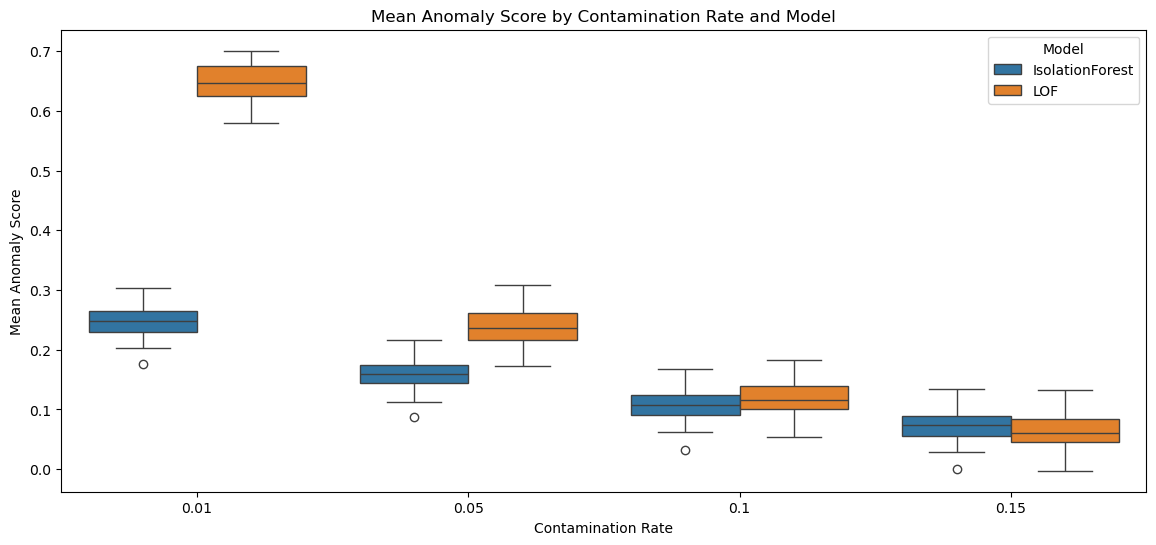

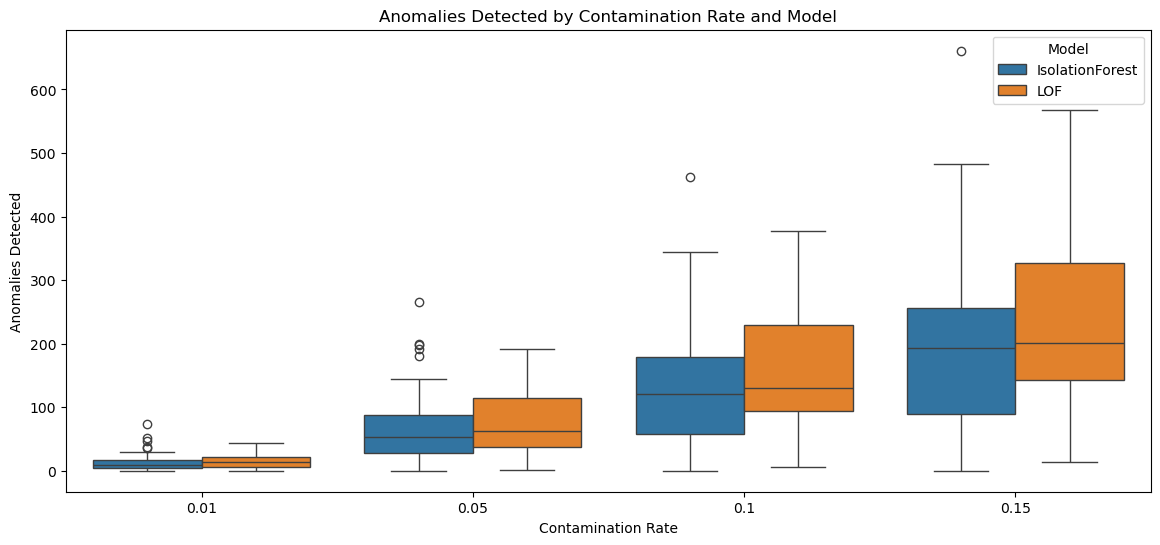

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Mean Anomaly Score by Contamination Rate, Fold Size, and Model
plt.figure(figsize=(14, 6))
sns.boxplot(data=results_df, x='Contamination Rate', y='Mean Anomaly Score', hue='Model')
plt.title('Mean Anomaly Score by Contamination Rate and Model')
plt.ylabel('Mean Anomaly Score')
plt.xlabel('Contamination Rate')
plt.legend(title='Model')
plt.show()

# Plot Anomalies Detected by Contamination Rate, Fold Size, and Model
plt.figure(figsize=(14, 6))
sns.boxplot(data=results_df, x='Contamination Rate', y='Anomalies Detected', hue='Model')
plt.title('Anomalies Detected by Contamination Rate and Model')
plt.ylabel('Anomalies Detected')
plt.xlabel('Contamination Rate')
plt.legend(title='Model')
plt.show()

,Model,Contamination Rate,Fold Size,Fold,Mean Anomaly Score,Anomalies Detected
0,IsolationForest,0.01,5,1,0.254786,17
1,IsolationForest,0.01,5,2,0.220598,74
2,IsolationForest,0.01,5,3,0.261454,10
3,IsolationForest,0.01,5,4,0.253319,36
4,IsolationForest,0.01,5,5,0.240463,30
5,LOF,0.01,5,1,0.644314,19
6,LOF,0.01,5,2,0.639808,44
7,LOF,0.01,5,3,0.646403,41
8,LOF,0.01,5,4,0.669813,26
9,LOF,0.01,5,5,0.631974,34


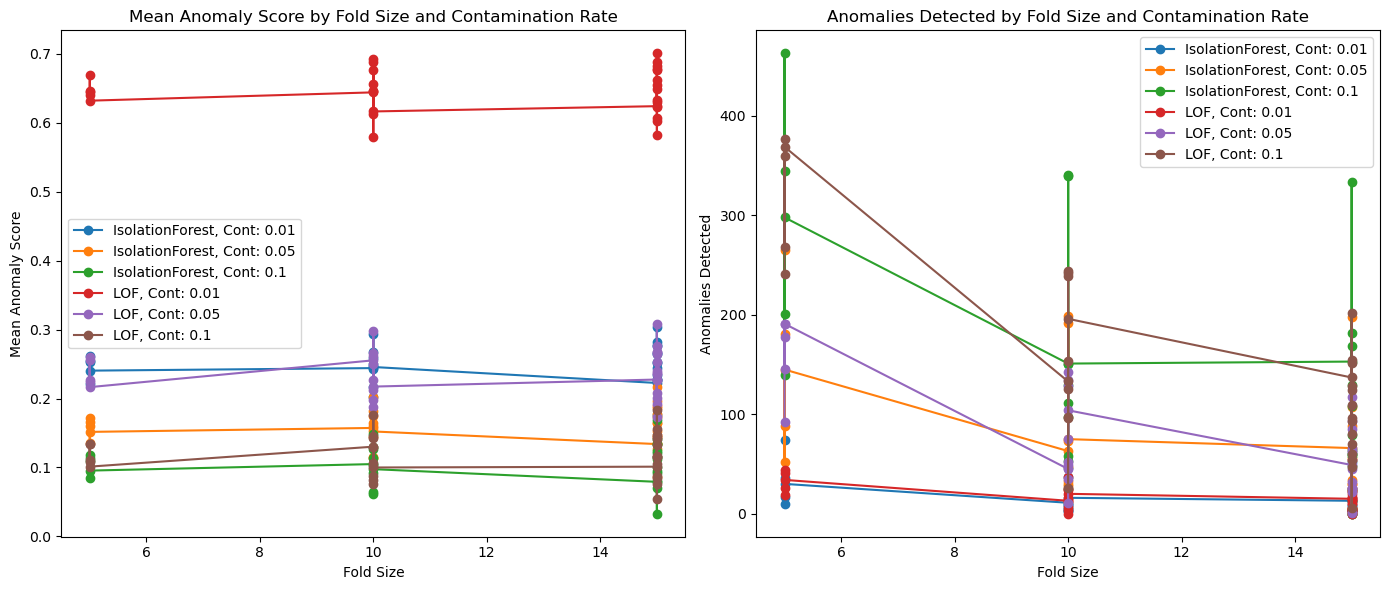

Mean Anomaly Scores Summary:
              Model  Contamination Rate  Fold Size  Mean Anomaly Score
0   IsolationForest                0.01          5            0.246124
1   IsolationForest                0.01         10            0.246899
2   IsolationForest                0.01         15            0.248944
3   IsolationForest                0.05          5            0.156967
4   IsolationForest                0.05         10            0.156654
5   IsolationForest                0.05         15            0.159633
6   IsolationForest                0.10          5            0.104556
7   IsolationForest                0.10         10            0.104320
8   IsolationForest                0.10         15            0.106705
9               LOF                0.01          5            0.646462
10              LOF                0.01         10            0.645834
11              LOF                0.01         15            0.646195
12              LOF                0.05         

In [42]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define feature columns and dataset
feature_columns = ['Acc X', 'gyro_x', 'gyro_y', 'gyro_z', 'Acc Y', 'Acc Z']
X = data[feature_columns].values

# Define parameters for cross-validation
fold_sizes = [5, 10, 15]  # Different fold sizes to test
contamination_rates = [0.01, 0.05, 0.1]  # Test multiple contamination rates

# Initialize results storage
results = {
    'Model': [],
    'Contamination Rate': [],
    'Fold Size': [],
    'Fold': [],
    'Mean Anomaly Score': [],
    'Anomalies Detected': []
}

# Function to evaluate a model using K-Fold Cross-Validation
def cross_validate_model(model, model_name, fold_size, contamination_rate):
    kf = KFold(n_splits=fold_size)
    fold_num = 1

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]

        # Fit the model on the training set
        model.fit(X_train)
        if model_name == 'LOF':
            anomaly_scores = model.decision_function(X_test)  # Obtain anomaly scores
            anomalies = model.predict(X_test)  # Obtain anomaly predictions
        else:
            anomaly_scores = model.decision_function(X_test)
            anomalies = model.predict(X_test)

        # Calculate metrics for this fold
        mean_anomaly_score = np.mean(anomaly_scores)
        anomalies_detected = sum(anomalies == -1)

        # Store results
        results['Model'].append(model_name)
        results['Contamination Rate'].append(contamination_rate)
        results['Fold Size'].append(fold_size)
        results['Fold'].append(fold_num)
        results['Mean Anomaly Score'].append(mean_anomaly_score)
        results['Anomalies Detected'].append(anomalies_detected)

        # Move to next fold
        fold_num += 1

# Run cross-validation on Isolation Forest and LOF with varying fold sizes and contamination rates
for contamination_rate in contamination_rates:
    for fold_size in fold_sizes:
        # Isolation Forest model
        iso_forest = IsolationForest(contamination=contamination_rate, n_estimators=100, random_state=42)
        cross_validate_model(iso_forest, 'IsolationForest', fold_size, contamination_rate)

        # Local Outlier Factor model
        lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination_rate, novelty=True)
        cross_validate_model(lof, 'LOF', fold_size, contamination_rate)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display results
display(results_df)

# Plot mean anomaly scores and anomalies detected by fold size and contamination rate
plt.figure(figsize=(14, 6))

# Plot Mean Anomaly Scores
plt.subplot(1, 2, 1)
for model in results_df['Model'].unique():
    for contamination in results_df['Contamination Rate'].unique():
        subset = results_df[(results_df['Model'] == model) & (results_df['Contamination Rate'] == contamination)]
        plt.plot(subset['Fold Size'], subset['Mean Anomaly Score'], marker='o', label=f"{model}, Cont: {contamination}")
plt.xlabel("Fold Size")
plt.ylabel("Mean Anomaly Score")
plt.legend(loc="best")
plt.title("Mean Anomaly Score by Fold Size and Contamination Rate")

# Plot Anomalies Detected
plt.subplot(1, 2, 2)
for model in results_df['Model'].unique():
    for contamination in results_df['Contamination Rate'].unique():
        subset = results_df[(results_df['Model'] == model) & (results_df['Contamination Rate'] == contamination)]
        plt.plot(subset['Fold Size'], subset['Anomalies Detected'], marker='o', label=f"{model}, Cont: {contamination}")
plt.xlabel("Fold Size")
plt.ylabel("Anomalies Detected")
plt.legend(loc="best")
plt.title("Anomalies Detected by Fold Size and Contamination Rate")

plt.tight_layout()
plt.show()

# Optional: Analyze the results further
mean_scores_summary = results_df.groupby(['Model', 'Contamination Rate', 'Fold Size'])['Mean Anomaly Score'].mean().reset_index()
print("Mean Anomaly Scores Summary:")
print(mean_scores_summary)
